# **Credit Card Default - Exploratory Data Analysis**

# Importing Packages 

In [ ]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

# Needed Packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
sns.set()

# Importing Dataset

In [ ]:
url = "https://raw.githubusercontent.com/arya289/Credit-Card/main/Credit_Card.csv"
df = pd.read_csv(url, sep = ';')
df

,ID,LIMIT_BAL,GENDER,EDUC,MARITAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,F,Bachelors,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,Bachelors,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,Bachelors,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,Bachelors,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,Bachelors,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,HS,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,M,HS,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,M,Bachelors,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,M,HS,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Select Observed Variables

In this task, we are only going to explore several variables such as: `LIMIT_BAL`, `GENDER`, `EDUC`, `MARITAL`, `AGE`, `PAY_1`, `BILL_AMT1`, `PAY_AMT1`, and `DEFAULT`. Therefore, we will going to exclude the other variables from `df` dataset, and rename it with `df_cc`.

In [ ]:
df_cc = df[["LIMIT_BAL", "GENDER", "EDUC", "MARITAL", "AGE", "PAY_1", "BILL_AMT1", "PAY_AMT1", "DEFAULT"]]
df_cc

,LIMIT_BAL,GENDER,EDUC,MARITAL,AGE,PAY_1,BILL_AMT1,PAY_AMT1,DEFAULT
0,20000,F,Bachelors,Married,24,2,3913,0,1
1,120000,F,Bachelors,Single,26,-1,2682,0,1
2,90000,F,Bachelors,Single,34,0,29239,1518,0
3,50000,F,Bachelors,Married,37,0,46990,2000,0
4,50000,M,Bachelors,Married,57,-1,8617,2000,0
...,...,...,...,...,...,...,...,...,...
29995,220000,M,HS,Married,39,0,188948,8500,0
29996,150000,M,HS,Single,43,-1,1683,1837,0
29997,30000,M,Bachelors,Single,37,4,3565,0,1
29998,80000,M,HS,Married,41,1,-1645,85900,1


In [ ]:
df_c = df_cc.copy()

In [ ]:
df_c.groupby(['DEFAULT']).count()[['GENDER']]

,GENDER
DEFAULT,
0,23364
1,6636


# Inspecting Dataset

Before we are going to conduct descriptive analysis or Exploratory Data Analysis (EDA), we will going to inspect the data first.

## Data Definition


- `ID` : Customer Number
- `LIMIT_BAL` : Total amount of the given credit in New Taiwanese Dollars (NTD)
- `GENDER` : Male or Female
- `EDUC` : Level of highest education
- `MARITAL` : Marital Status
- `AGE` : Age of card holder
- `PAY_1` : History of payment from last month (-1: pay duly, i: payment delay for i month(s))
- `BILL_AMT1` : Amount of current bill statement
- `PAY_AMT1` : Amount of previous payment
- `DEFAULT` : 1 if defaulted, 0 if if not

## First and Last Rows

In [ ]:
df_cc.head()

,LIMIT_BAL,GENDER,EDUC,MARITAL,AGE,PAY_1,BILL_AMT1,PAY_AMT1,DEFAULT
0,20000,F,Bachelors,Married,24,2,3913,0,1
1,120000,F,Bachelors,Single,26,-1,2682,0,1
2,90000,F,Bachelors,Single,34,0,29239,1518,0
3,50000,F,Bachelors,Married,37,0,46990,2000,0
4,50000,M,Bachelors,Married,57,-1,8617,2000,0


In [ ]:
df_cc.tail()

,LIMIT_BAL,GENDER,EDUC,MARITAL,AGE,PAY_1,BILL_AMT1,PAY_AMT1,DEFAULT
29995,220000,M,HS,Married,39,0,188948,8500,0
29996,150000,M,HS,Single,43,-1,1683,1837,0
29997,30000,M,Bachelors,Single,37,4,3565,0,1
29998,80000,M,HS,Married,41,1,-1645,85900,1
29999,50000,M,Bachelors,Married,46,0,47929,2078,1


## Data Dimension

In [ ]:
df_cc.shape

(30000, 9)

In total, there are 30,000 rows and 9 columns from the dataset that are going to be observed.

## Data Type & Null Values

In [ ]:
df_cc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   GENDER     30000 non-null  object
 2   EDUC       30000 non-null  object
 3   MARITAL    30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_1      30000 non-null  int64 
 6   BILL_AMT1  30000 non-null  int64 
 7   PAY_AMT1   30000 non-null  int64 
 8   DEFAULT    30000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.1+ MB


In [ ]:
df_cc.isna().sum()

LIMIT_BAL    0
GENDER       0
EDUC         0
MARITAL      0
AGE          0
PAY_1        0
BILL_AMT1    0
PAY_AMT1     0
DEFAULT      0
dtype: int64

There are 6 integer variables (numerical), and 3 object variables (categorical) in our dataset. Notice that there is no null values in this dataset, so we will not need to replacing missing values.

## Describe Numerical Variables

In [ ]:
df_cc.describe()

,LIMIT_BAL,AGE,PAY_1,BILL_AMT1,PAY_AMT1,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,51223.330900,5663.580500,0.221200
std,129747.661567,9.217904,1.123802,73635.860576,16563.280354,0.415062
min,10000.000000,21.000000,-2.000000,-165580.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,3558.750000,1000.000000,0.000000
50%,140000.000000,34.000000,0.000000,22381.500000,2100.000000,0.000000
75%,240000.000000,41.000000,0.000000,67091.000000,5006.000000,0.000000
max,1000000.000000,79.000000,8.000000,964511.000000,873552.000000,1.000000


- The difference between mean and maximum values of `LIMIT_BAL` variable is quite far, meaning we could expect a right-skewed distribution. Another interesting finding is the difference between 3rd quartile and max value is quite high, indicating that there may be outliers in the upper values.
- As we may expect in the `AGE` variable, the holders of Credit Card are still in productive age. However, it is quite odd that the maximum age of card holder is 79 years old. This might indicating outlier, since the maximum allowed age is usually 65 years old.
- In `PAY_1` variable, we can see that most of the Card Holders are not in late payment condition. Since the mean of `PAY_1` is negative (indicates most of them pay duly), and in the 3rd quartile of card holders are still having 0 value. (no payment delay).
- As for the `BILL_1` and `PAY_1`, we can see that Card Holders are tend to pay about 11% -around the minimum allowed payment- from their total bill (by divide the mean of `PAY_1` and `BILL_1`).
- In the `DEFAULT` variable, it is not wise to treat it as numerical, since basically it was a categorical variable with Yes for 1 (default), and No for 0 (non-default). We will convert this later. But the interesting finding is only 22% of Credit Card holders are default in this dataset, meaning the selection of credit card holder is quite good. 

## Describe Categorical Values

In [ ]:
df_cc.describe(exclude=[np.number])

,GENDER,EDUC,MARITAL
count,30000,30000,30000
unique,2,4,3
top,F,Bachelors,Single
freq,18112,14030,15964


In [ ]:
print (df_cc['GENDER'].unique())

['F' 'M']


In [ ]:
print (df_cc['EDUC'].unique())

['Bachelors' 'Masters' 'HS' 'Other']


In [ ]:
print (df_cc['MARITAL'].unique())

['Married' 'Single' 'Other']


- There are 2 genders as can be seen in `GENDER` variable. Interestingly, most of the Credit Card holders are Female (18,112 of 30,000 observations).
- In `EDUC` variable, there are 4 education levels, and most of the Credit Card holders are having Bachelor degree.
- In `MARITAL` variable, there are 3 categories, and mostly the Credit Card holders are in Single status (more than 50% from total observations).

## Target Variable (`DEFAULT`)

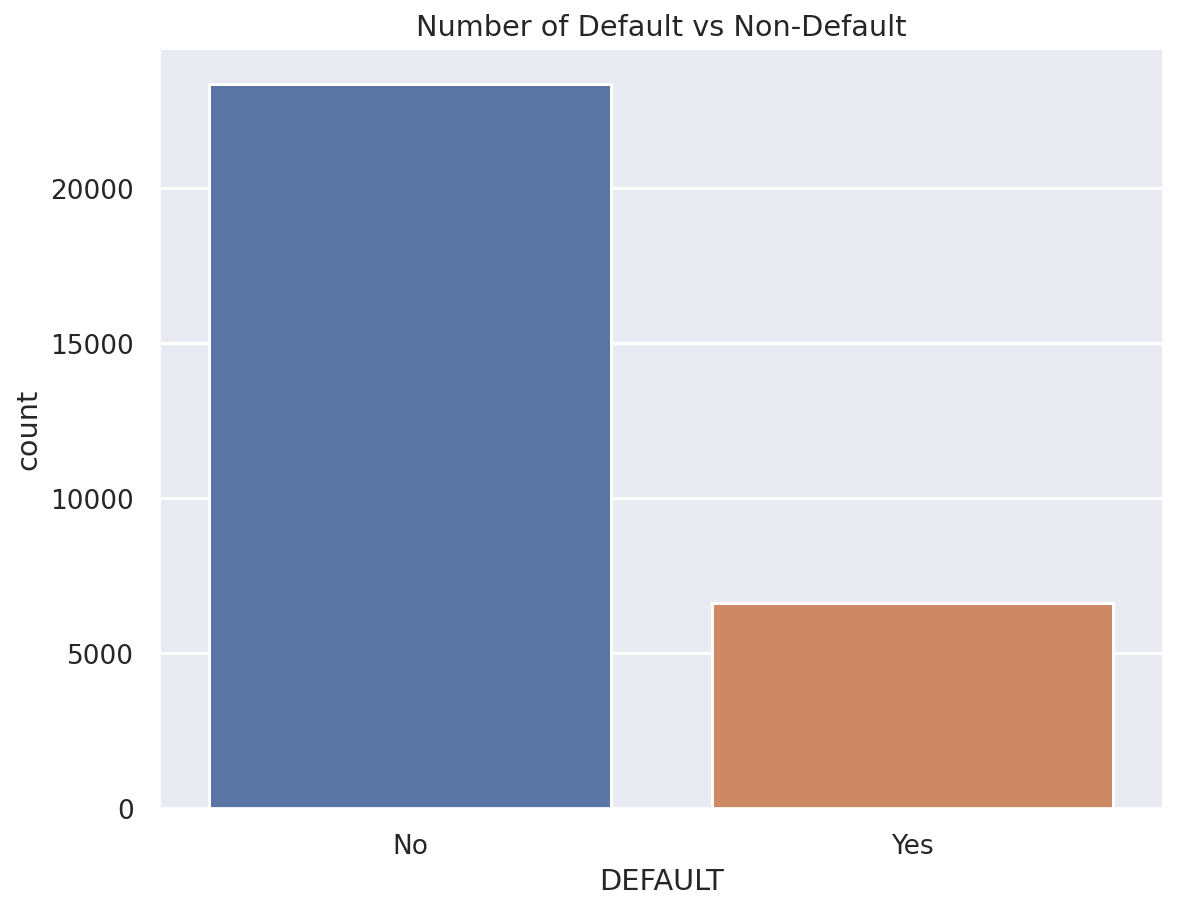

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

target = sns.countplot(x='DEFAULT', data=df_cc)
target.set(title='Number of Default vs Non-Default')
target.set_xticklabels(['No','Yes'])
plt.show()

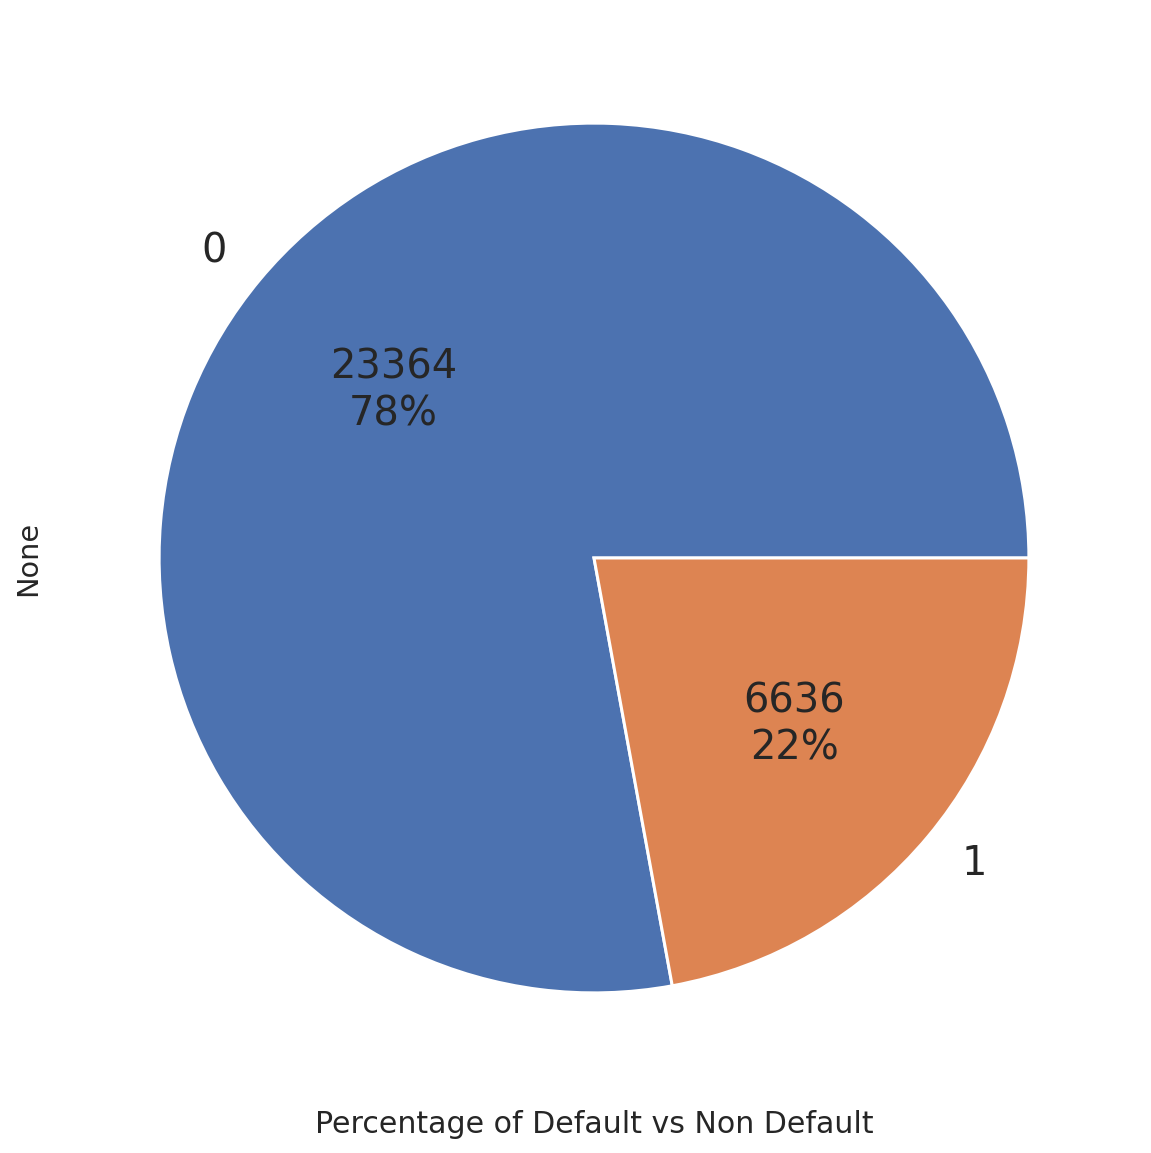

In [ ]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 10))

df_cc.groupby('DEFAULT').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20}, ax = ax1)
ax1.set_xlabel('Percentage of Default vs Non Default', size=15)
plt.show()

It seems there is huge different between the number of Default and Non-Default Card Holder. This is common since the Bank must be carefully selected the card applicants, therefore the number of Defaults can be reduced.

# Distribution Analysis

## Data Preparation
Before proceed to distribution analysis, we will need to do some adjustment to the dataset.

In [ ]:
df_cc.loc[df_cc["DEFAULT"] == 1, "DEFAULT"] = "Yes"
df_cc.loc[df_cc["DEFAULT"] == 0, "DEFAULT"] = "No"
df_cc.dtypes

LIMIT_BAL     int64
GENDER       object
EDUC         object
MARITAL      object
AGE           int64
PAY_1         int64
BILL_AMT1     int64
PAY_AMT1      int64
DEFAULT      object
dtype: object

In [ ]:
print (df_cc['DEFAULT'].unique())

['Yes' 'No']


In [ ]:
df_cc.loc[df_cc["GENDER"] == "F", "GENDER"] = "Female"
df_cc.loc[df_cc["GENDER"] == "M", "GENDER"] = "Male"
print (df_cc['GENDER'].unique())

['Female' 'Male']


In [ ]:
df_cc.loc[df_cc["EDUC"] == "HS", "EDUC"] = "High School"
print (df_cc['EDUC'].unique())

['Bachelors' 'Masters' 'High School' 'Other']


## Outliers Detection

In [ ]:
#took numericaldata type
nums2=df_cc.select_dtypes(include=['int64','float64'])

#see outliers for numerical data
for k, v in nums2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(nums2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column LIMIT_BAL outliers = 0.56%
Column AGE outliers = 0.91%
Column PAY_1 outliers = 10.43%
Column BILL_AMT1 outliers = 8.00%
Column PAY_AMT1 outliers = 9.15%


## Data Distribution

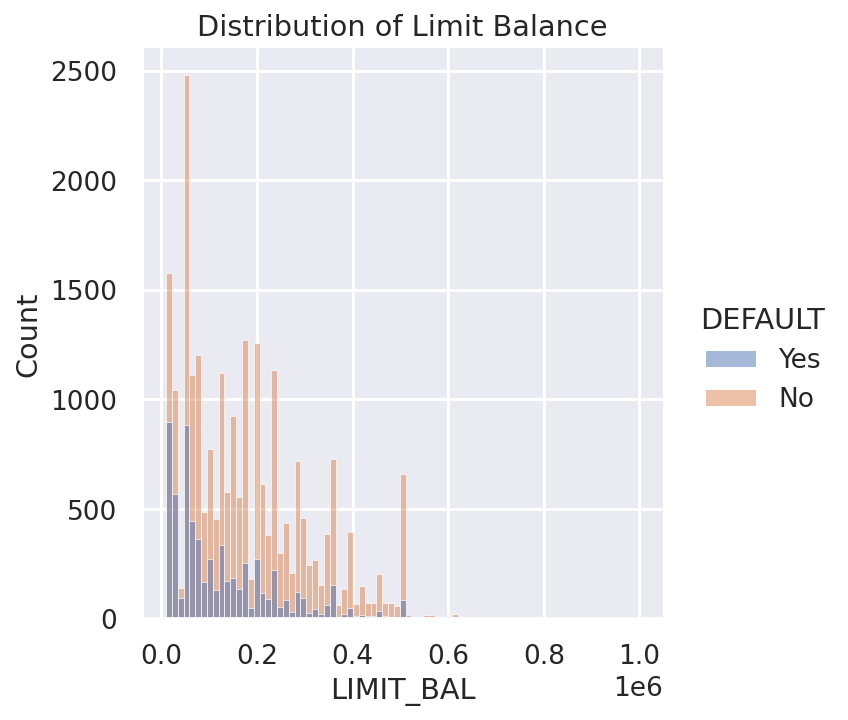

In [ ]:
sns.displot(df_cc, x="LIMIT_BAL", hue="DEFAULT").set(title='Distribution of Limit Balance')

The distribution of `LIMIT_BAL` seems not following normal distribution, and has a lot of spikes. Most of the Card Holders have limit balance around 100k. But interestingly, the patterns between Default and Non-Default are similar.

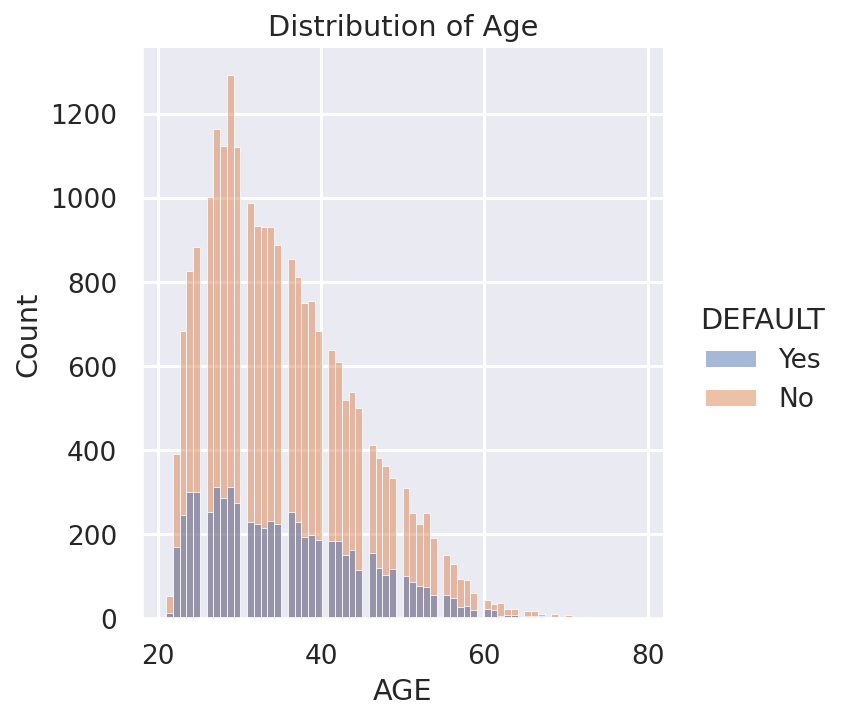

In [ ]:
sns.displot(df_cc, x="AGE", hue="DEFAULT").set(title='Distribution of Age')

As expected, the age of Card Holders mainly between the productive age, and mostly occured in 25 - 30 years old, and declining along with the age increment. The pattern between Default and Non-default also remain the same in Age distribution.

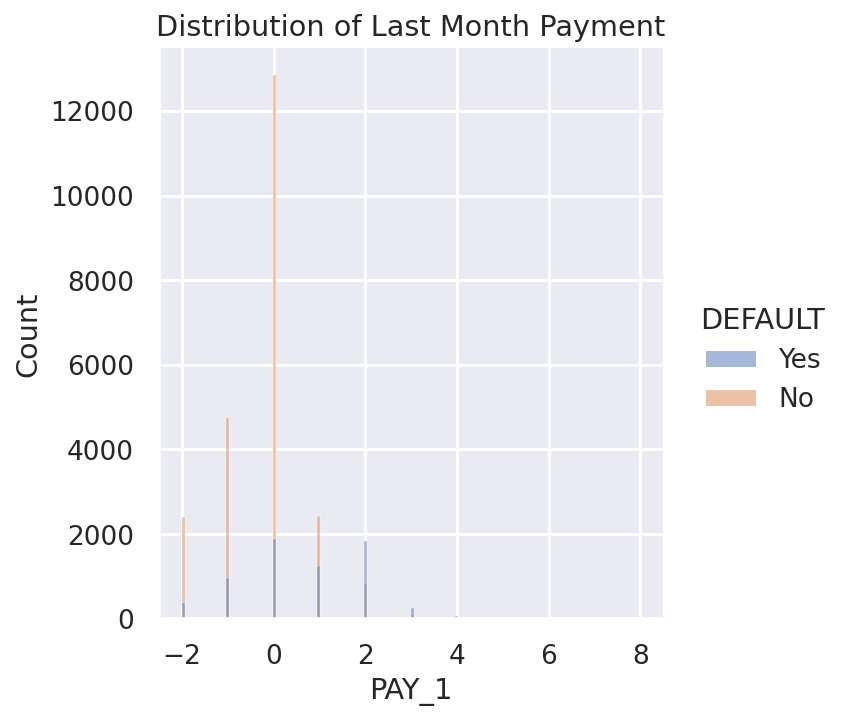

In [ ]:
sns.displot(df_cc, x="PAY_1", hue="DEFAULT").set(title='Distribution of Last Month Payment')

Most of the Non-Default holders are pay duly or on time, but some of them are still in late payment for 1 or 2 month. As for the Default Card Holders, as expected most of them are in late payment, and even the longest period are reaching 8 months. But surprisingly, there are some Default Card Holders which are not in late payment. This may indicates that Default status may not only come from the late payment.  

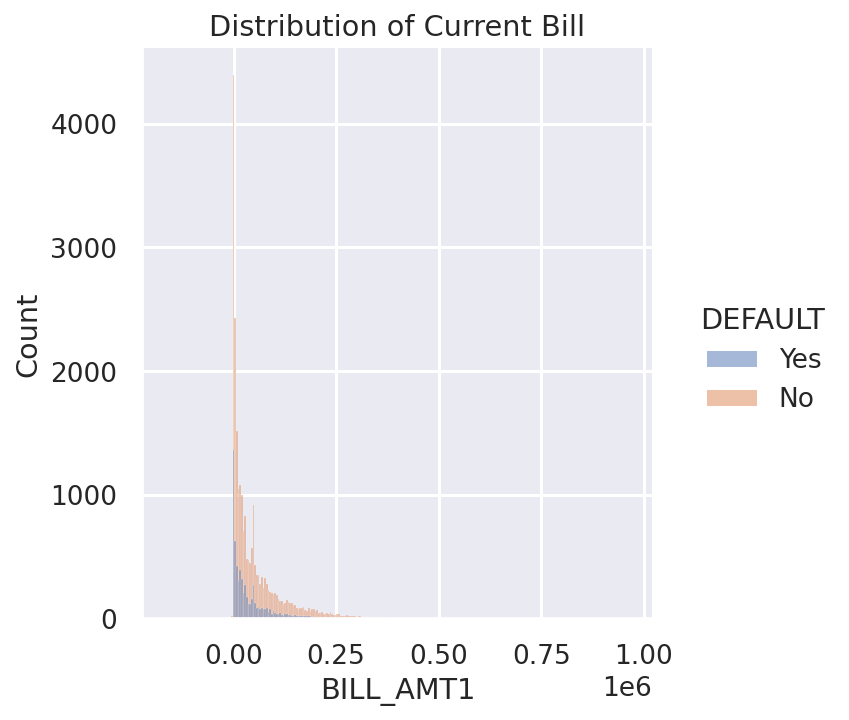

In [ ]:
sns.displot(df_cc, x="BILL_AMT1", hue="DEFAULT").set(title='Distribution of Current Bill')

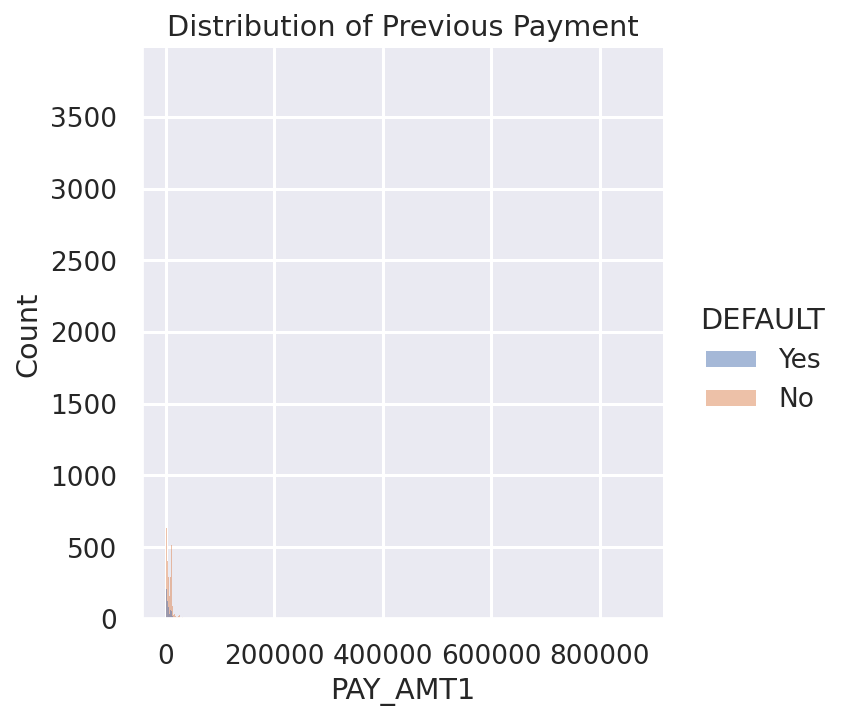

In [ ]:
sns.displot(df_cc, x="PAY_AMT1", hue="DEFAULT").set(title='Distribution of Previous Payment')

# Relationship Analysis

## Relationship Between Numerical Variables

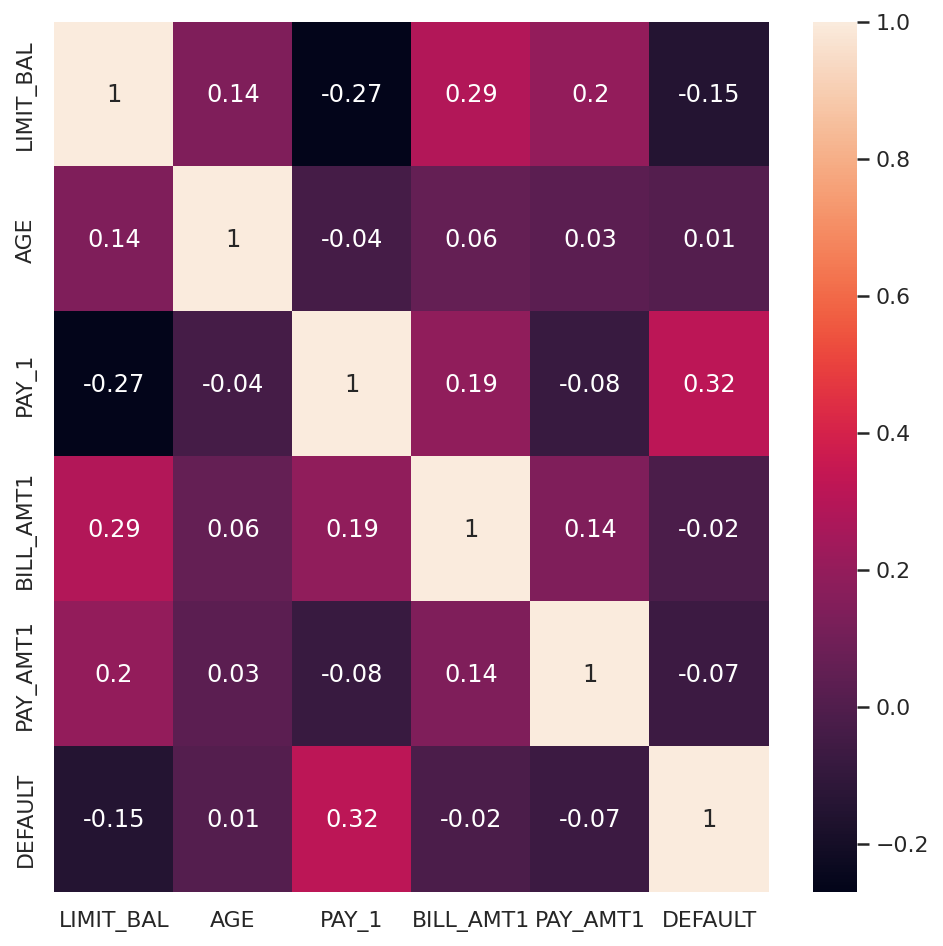

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
matrix = df_c.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

- No redundant values (above 0.7) between independent variables

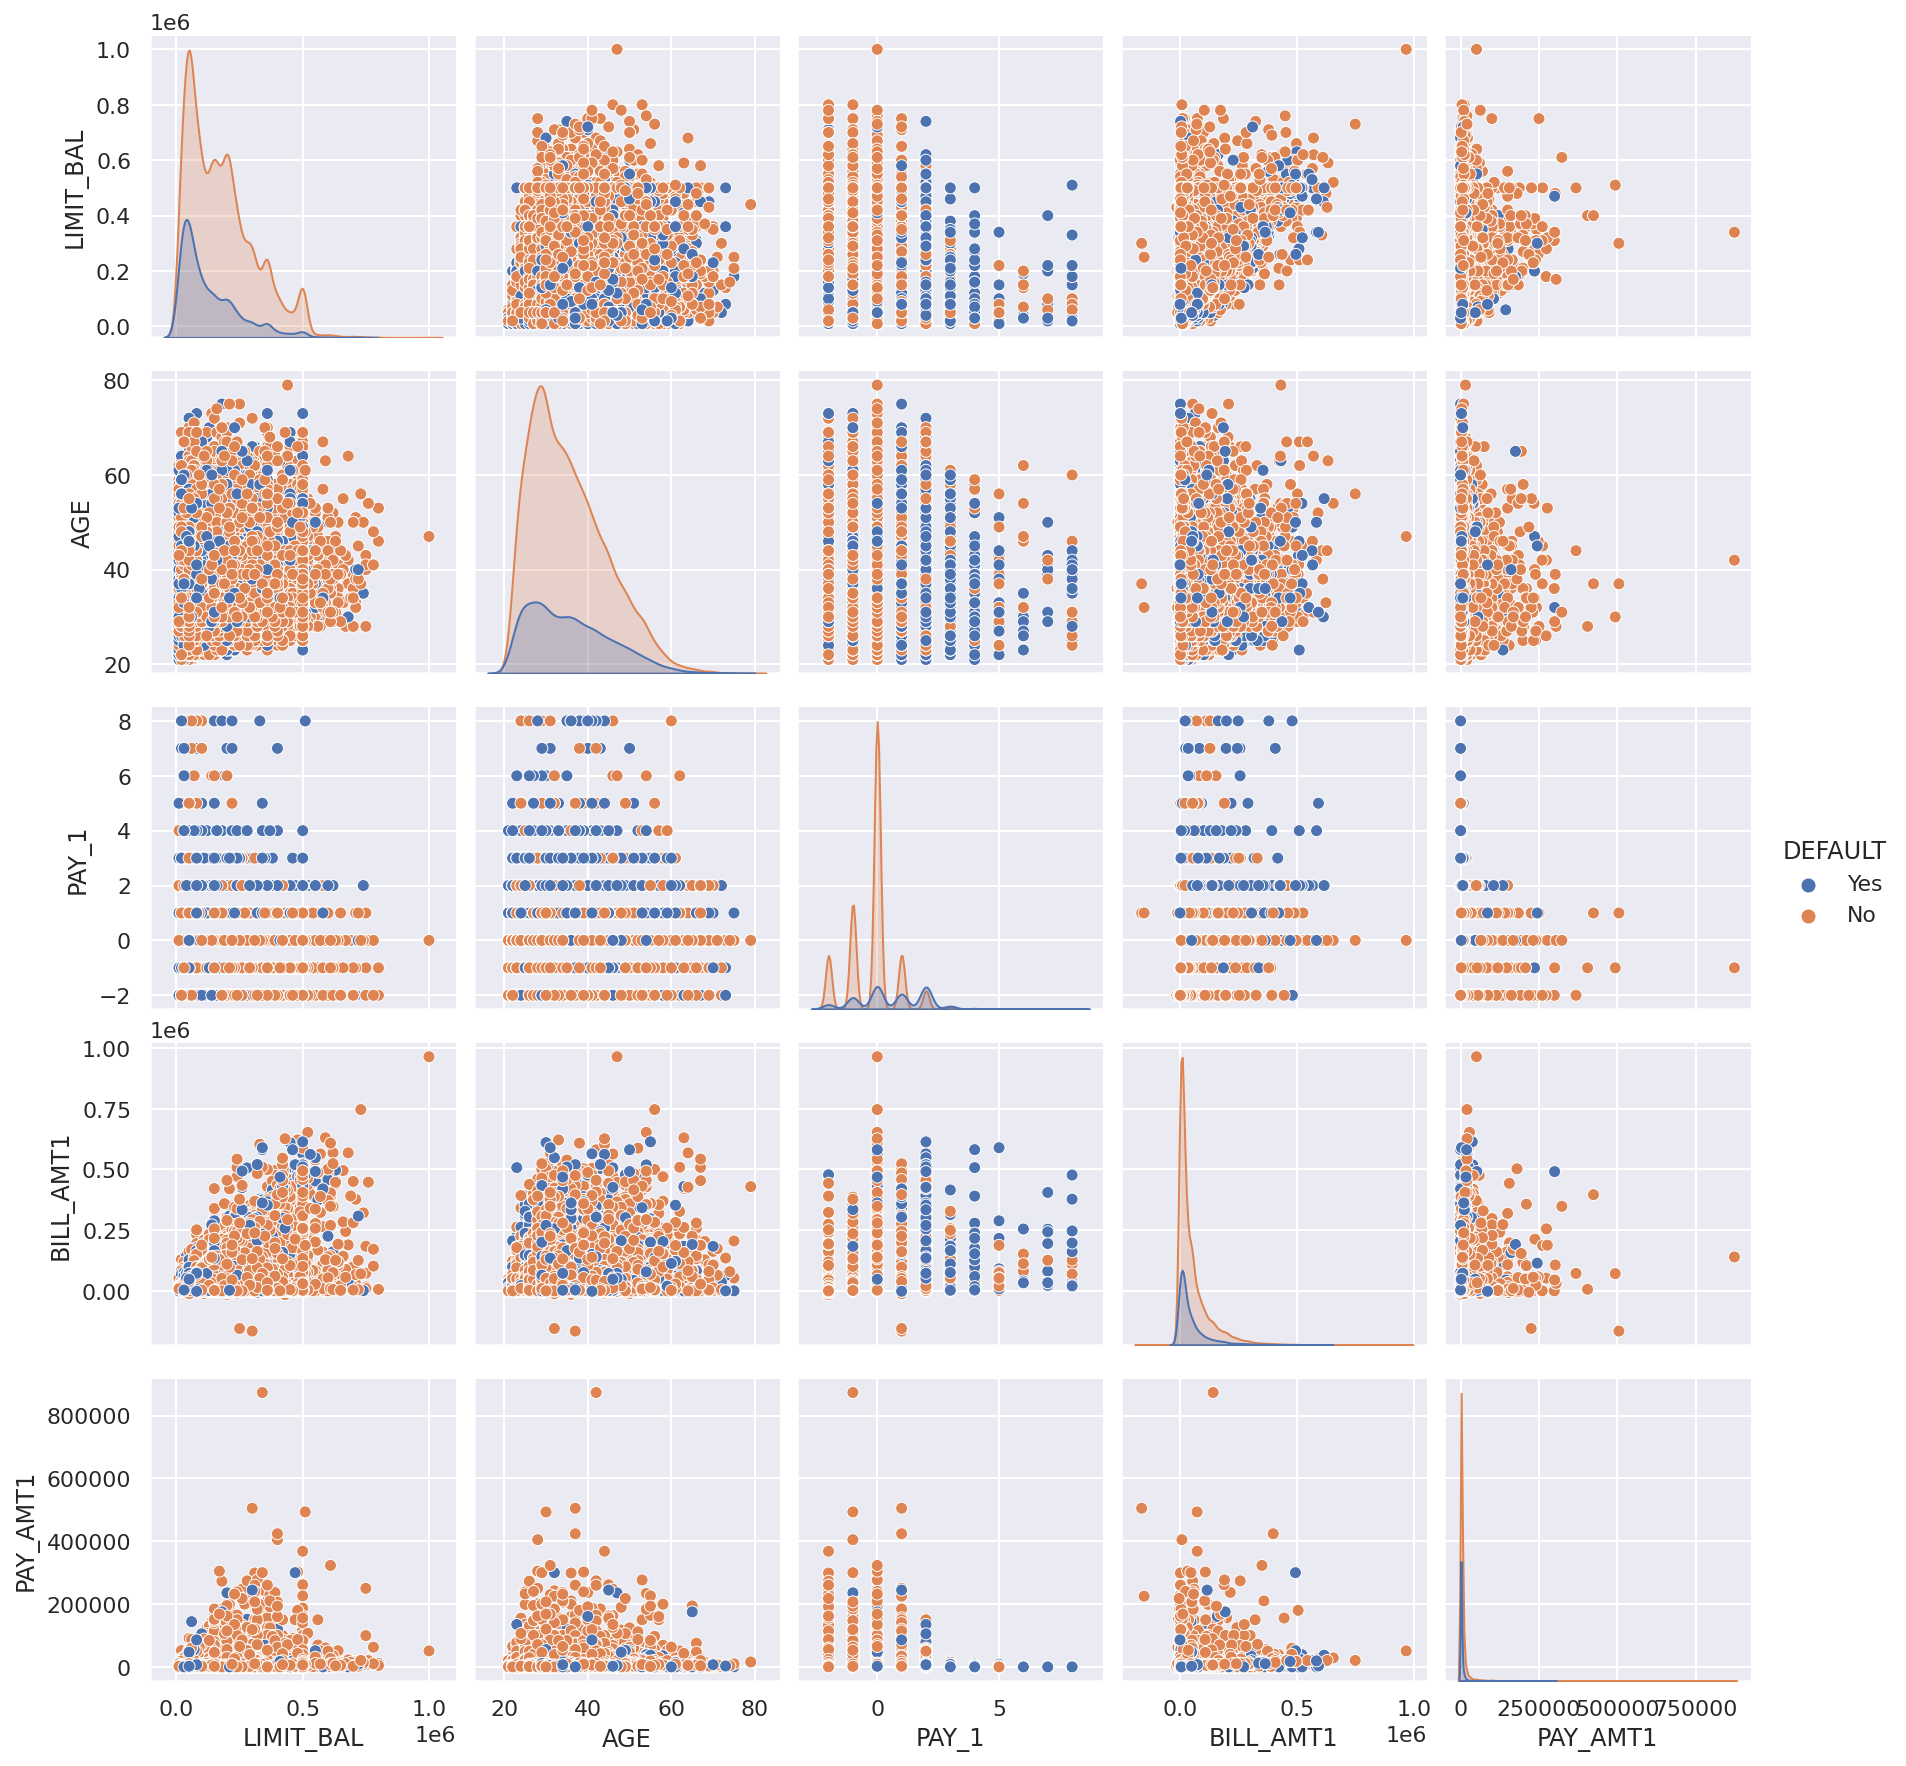

In [ ]:
sns.pairplot(data=df_cc, hue='DEFAULT')
plt.show()

- It seems there is low correlation among `AGE` and `LIMIT_BAL`. As can be seen in the correlation matrix (only 0.14), and no strong pattern in the scatter plot. Nevertheless, the Default Card Holders seem mostly occured on the age above 40, and limit balance below 200k.

## Relationship Between Categorical Variables

### Gender vs Default

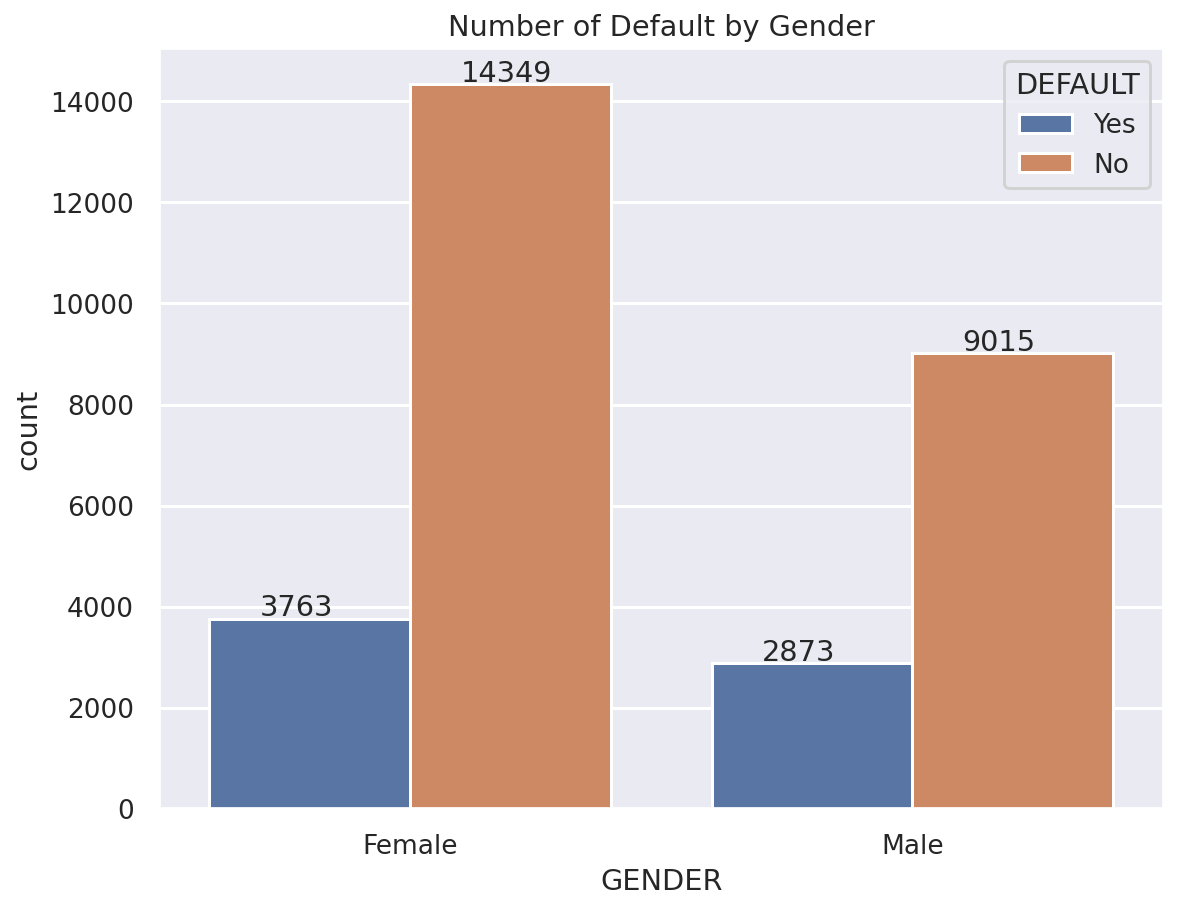

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

gen = sns.countplot(x='GENDER', hue='DEFAULT', data=df_cc)
gen.set_xticklabels(['Female','Male'])
plt.title("Number of Default by Gender")
for p in gen.patches:
        gen.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+60))
plt.show()



In [ ]:
cross_tab = pd.crosstab(index=df_cc['GENDER'],
                        columns=df_cc['DEFAULT'])
cross_tab

DEFAULT,No,Yes
GENDER,,
Female,14349,3763
Male,9015,2873


In [ ]:
cross_tab_prop = pd.crosstab(index=df_cc['GENDER'],
                             columns=df_cc['DEFAULT'],
                             normalize="index")
cross_tab_prop

DEFAULT,No,Yes
GENDER,,
Female,0.792237,0.207763
Male,0.758328,0.241672


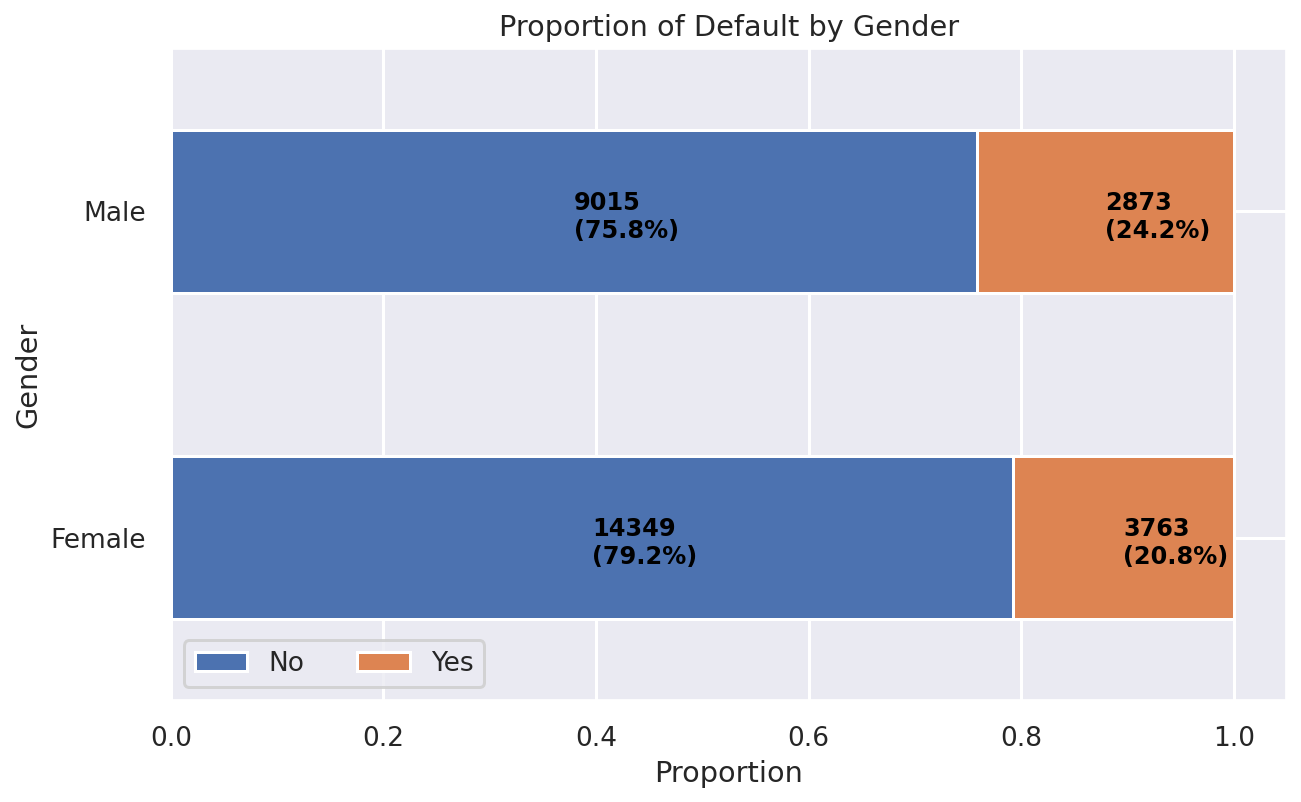

In [ ]:
cross_tab_prop.plot(kind='barh', 
                        stacked=True,  
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Gender")
plt.xlabel("Proportion")
plt.title("Proportion of Default by Gender")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.08,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

The number of Females that using Credit Card in this dataset is larger than the Males. But the interesting part is, the percentage of default is larger on Male instead of Female.

### Education vs Default

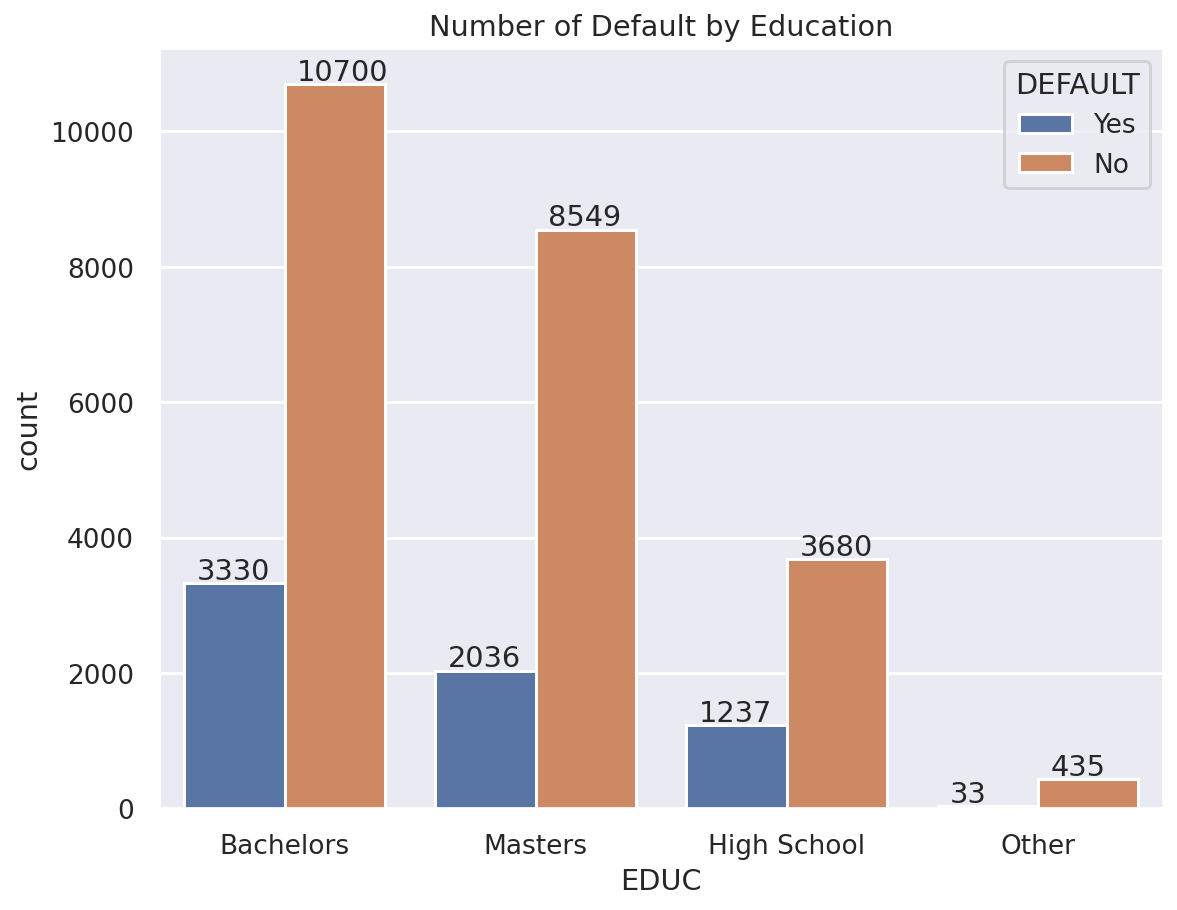

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUC', hue='DEFAULT', data=df_cc)
edu.set_xticklabels(['Bachelors','Masters','High School','Other'])
plt.title("Number of Default by Education")
for p in edu.patches:
         edu.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+60))
plt.show()

In [ ]:
cross_tab_edu = pd.crosstab(index=df_cc['EDUC'],
                        columns=df_cc['DEFAULT'])
cross_tab_edu

DEFAULT,No,Yes
EDUC,,
Bachelors,10700,3330
High School,3680,1237
Masters,8549,2036
Other,435,33


In [ ]:
cross_tab_prop_edu = pd.crosstab(index=df_cc['EDUC'],
                             columns=df_cc['DEFAULT'],
                             normalize="index")
cross_tab_prop_edu

DEFAULT,No,Yes
EDUC,,
Bachelors,0.762651,0.237349
High School,0.748424,0.251576
Masters,0.807652,0.192348
Other,0.929487,0.070513


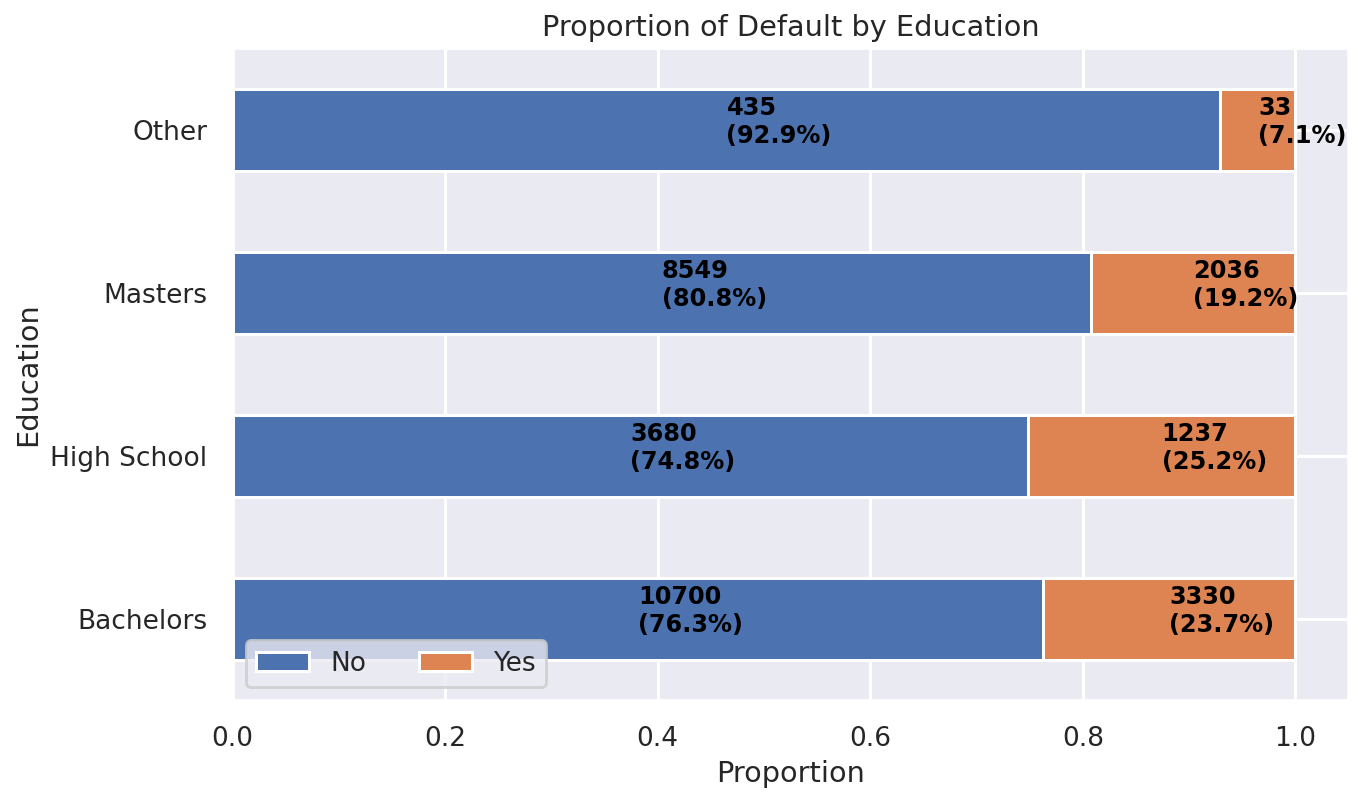

In [ ]:
cross_tab_prop_edu.plot(kind='barh', 
                        stacked=True,  
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Education")
plt.xlabel("Proportion")
plt.title("Proportion of Default by Education")


for n, x in enumerate([*cross_tab_edu.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_edu.loc[x],
                                          cross_tab_edu.loc[x],
                                          cross_tab_prop_edu.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.08,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

The highest number of Card Holder is having Bachelor Degree, and then follow by Master, High School, and the last one is Others. On the other hand, the Master Degree has lower default compared to Bachelor and High School degree. This might indicate the Masters degree has better ability to pay the bill, probably because better income.

### Marital Status vs Default

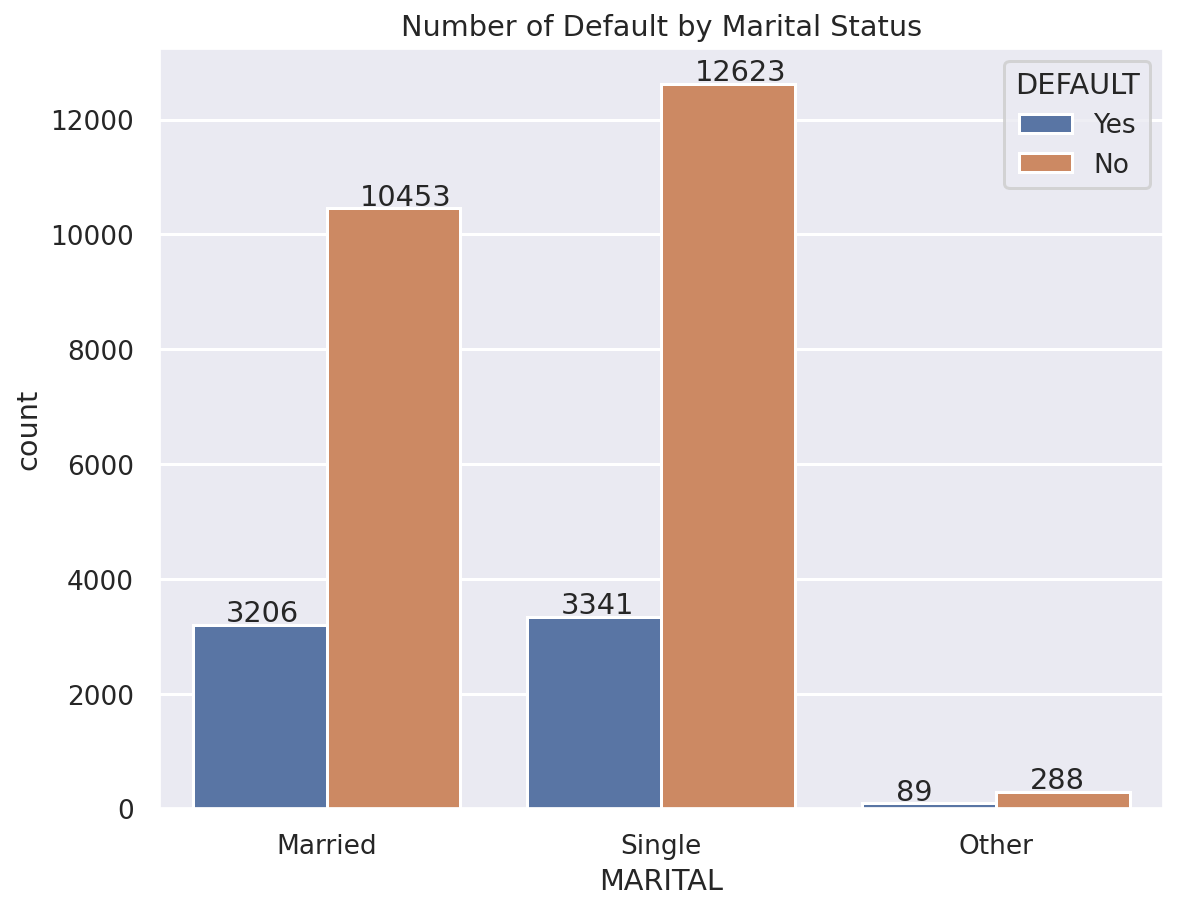

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

mari = sns.countplot(x='MARITAL', hue='DEFAULT', data=df_cc)
mari.set_xticklabels(['Married','Single','Other'])
plt.title("Number of Default by Marital Status")
for p in mari.patches:
         mari.annotate('{:1}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+60))
plt.show()

In [ ]:
cross_tab_mari = pd.crosstab(index=df_cc['MARITAL'],
                        columns=df_cc['DEFAULT'])
cross_tab_mari

DEFAULT,No,Yes
MARITAL,,
Married,10453,3206
Other,288,89
Single,12623,3341


In [ ]:
cross_tab_prop_mari = pd.crosstab(index=df_cc['MARITAL'],
                             columns=df_cc['DEFAULT'],
                             normalize="index")
cross_tab_prop_mari

DEFAULT,No,Yes
MARITAL,,
Married,0.765283,0.234717
Other,0.763926,0.236074
Single,0.790717,0.209283


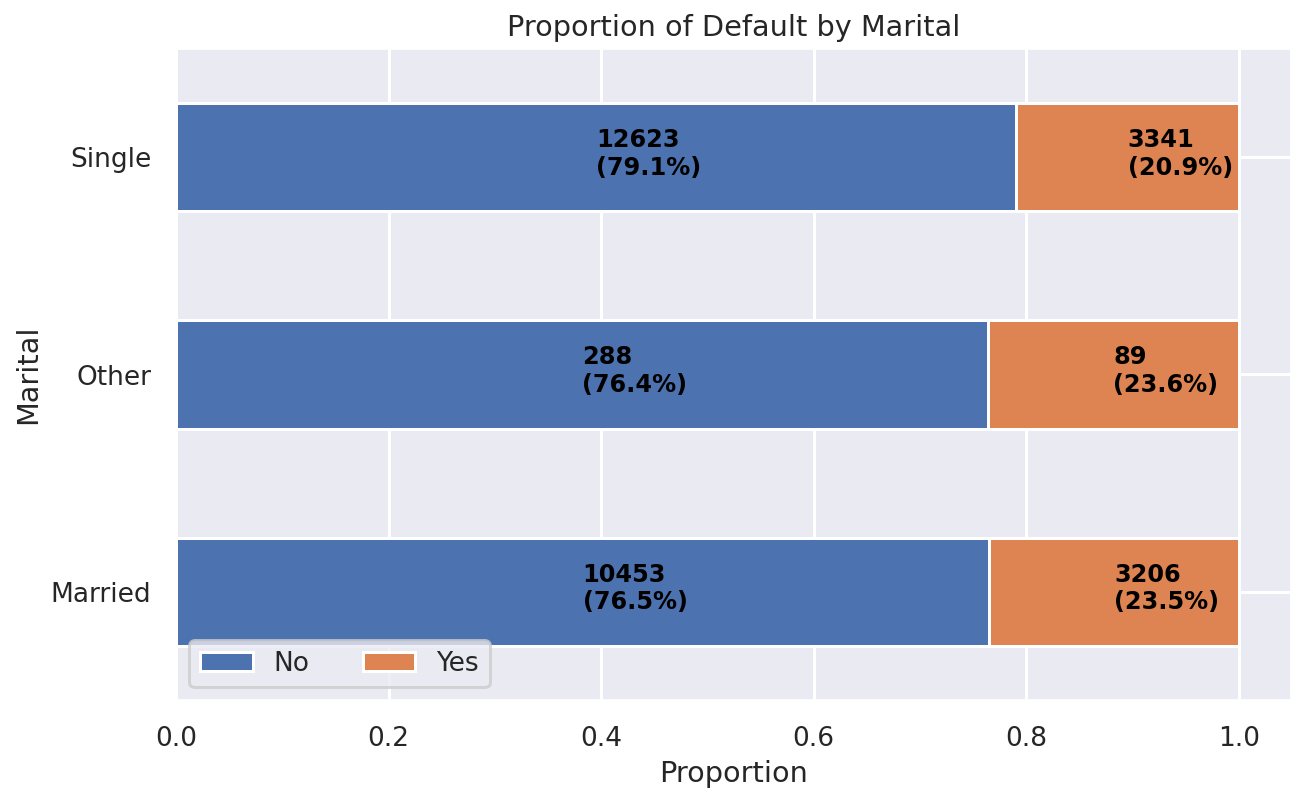

In [ ]:
cross_tab_prop_mari.plot(kind='barh', 
                        stacked=True,  
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Marital")
plt.xlabel("Proportion")
plt.title("Proportion of Default by Marital")


for n, x in enumerate([*cross_tab_mari.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop_mari.loc[x],
                                          cross_tab_mari.loc[x],
                                          cross_tab_prop_mari.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.08,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

The number of Card Holder is larger in the Single Marital Status, but surprisingly, the number of Default is larger in Married status than the Single status. Although the combined income in Married status might be larger than the Single income, but their living cost might be higher, and led into default in bill payment.

## Relationship Between Numerical and Categorical Variables

### Gender vs Limit Balance

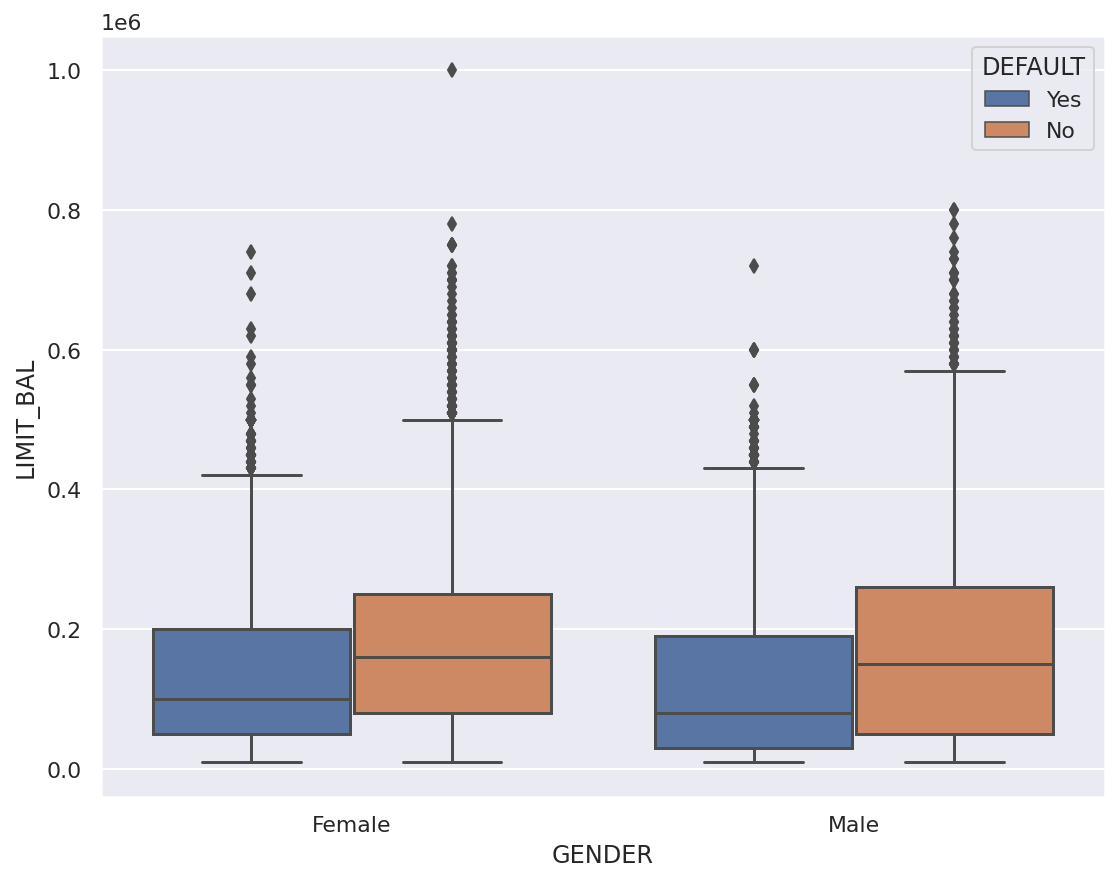

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='GENDER', y='LIMIT_BAL', hue='DEFAULT', data=df_cc);

The limit balance of Female is not so much differ than the Male, both in Default and Not Default. It seems there is no significance between Male and Female regarding to their limit balance and the default.

### Gender vs Age

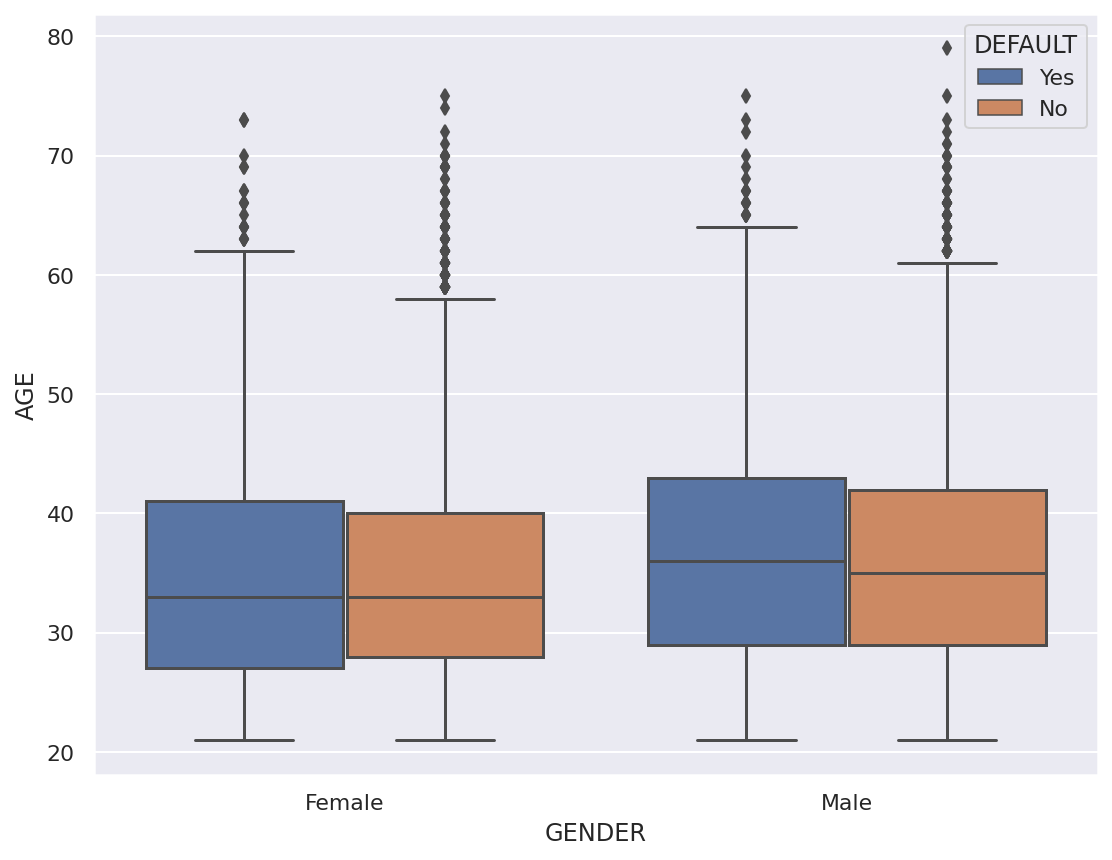

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='GENDER', y='AGE', hue='DEFAULT', data=df_cc);

Male gender has older age than the Female one. Some interesting finding, the default in Male is older (bigger median) than the non default. But in Female, there is no significant age difference between default and non-default.

### Gender vs Bill Amount

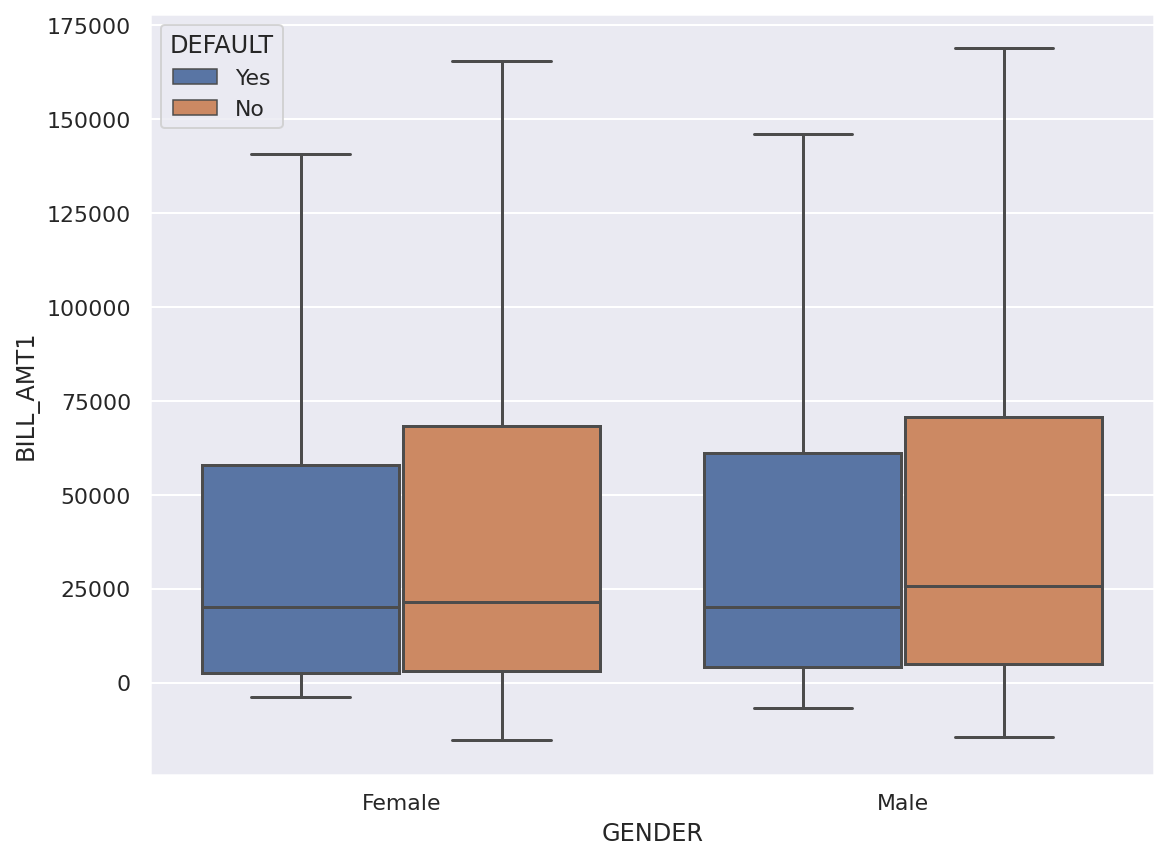

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='GENDER', y='BILL_AMT1', hue='DEFAULT', data=df_cc, showfliers = False);

The bill amount on Male is slightly higher than the Female.

### Gender vs Pay Amount

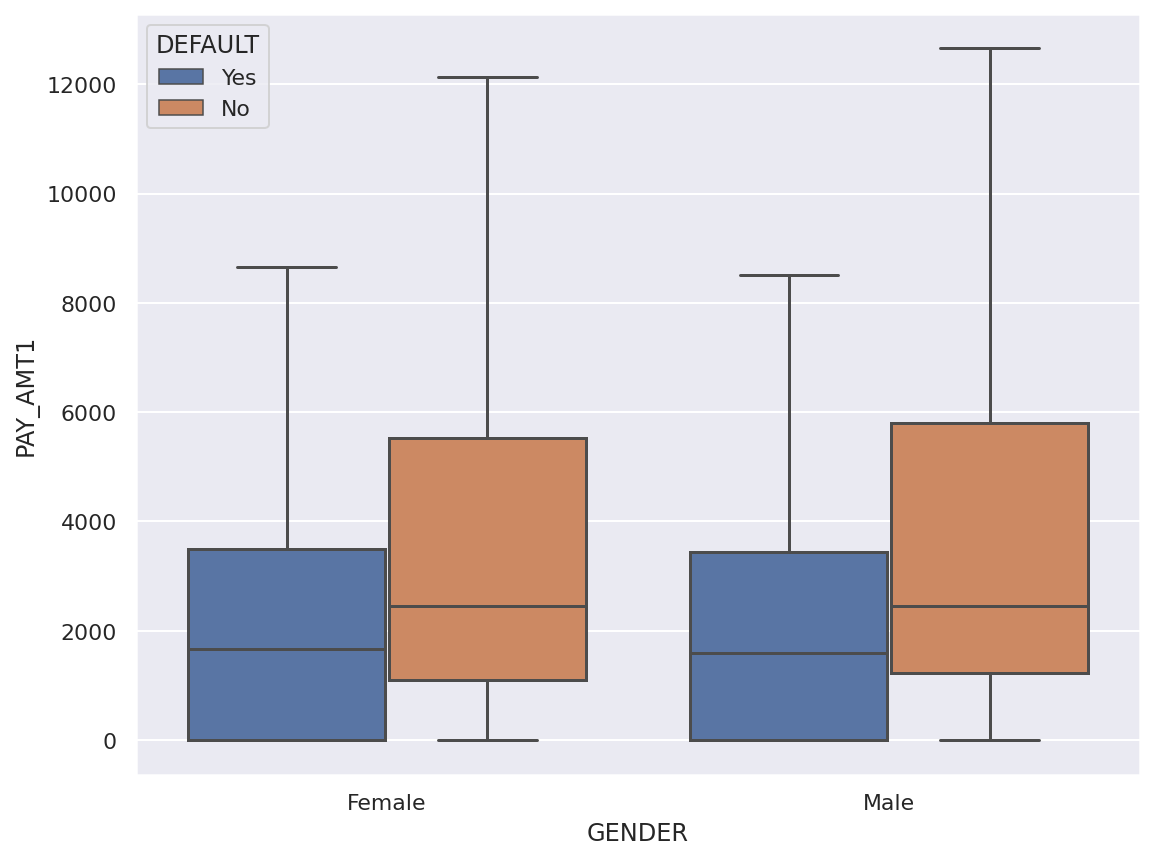

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='GENDER', y='PAY_AMT1', hue='DEFAULT', data=df_cc, showfliers = False);

There is no significant difference between Male and Fenale in Pay Amount, but the Default Card Holder has much lower Pay Amount than the Non-Default.

### Education vs Limit Balance

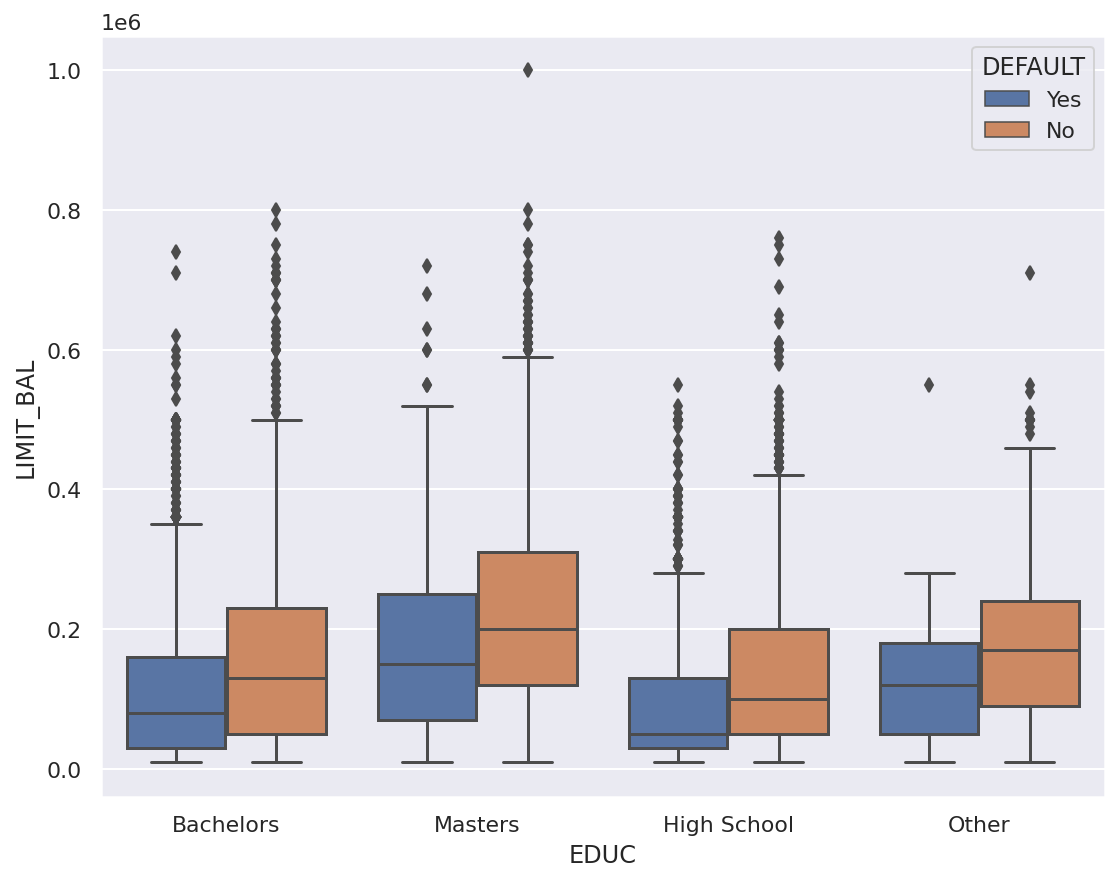

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='EDUC', y='LIMIT_BAL', hue='DEFAULT', data=df_cc);

As expected from the previous analysis, the Masters Degree seems has a better income which reflected in highet Limit Balance, than the Bachelor and High School. In every education level, the Non-Default has a higher limit balance median than the Default.

### Education vs Age

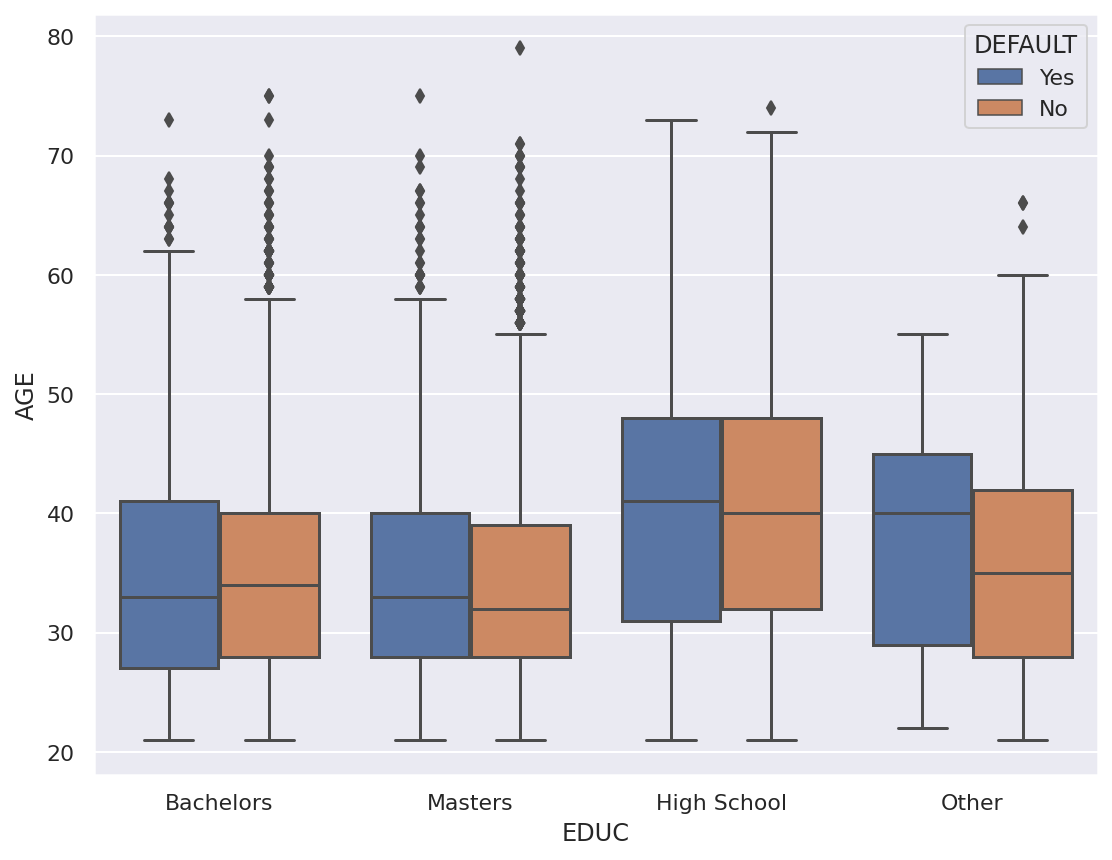

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='EDUC', y='AGE', hue='DEFAULT', data=df_cc);

Surprisingly, the Age median of High School degree education is older than Bachelor and Master degreee. This may indicate that the High School graduate in this dataset is not continuing their education level, therefore their income might not as high as Bachelor/Master Degree.

### Education vs Bill Amount

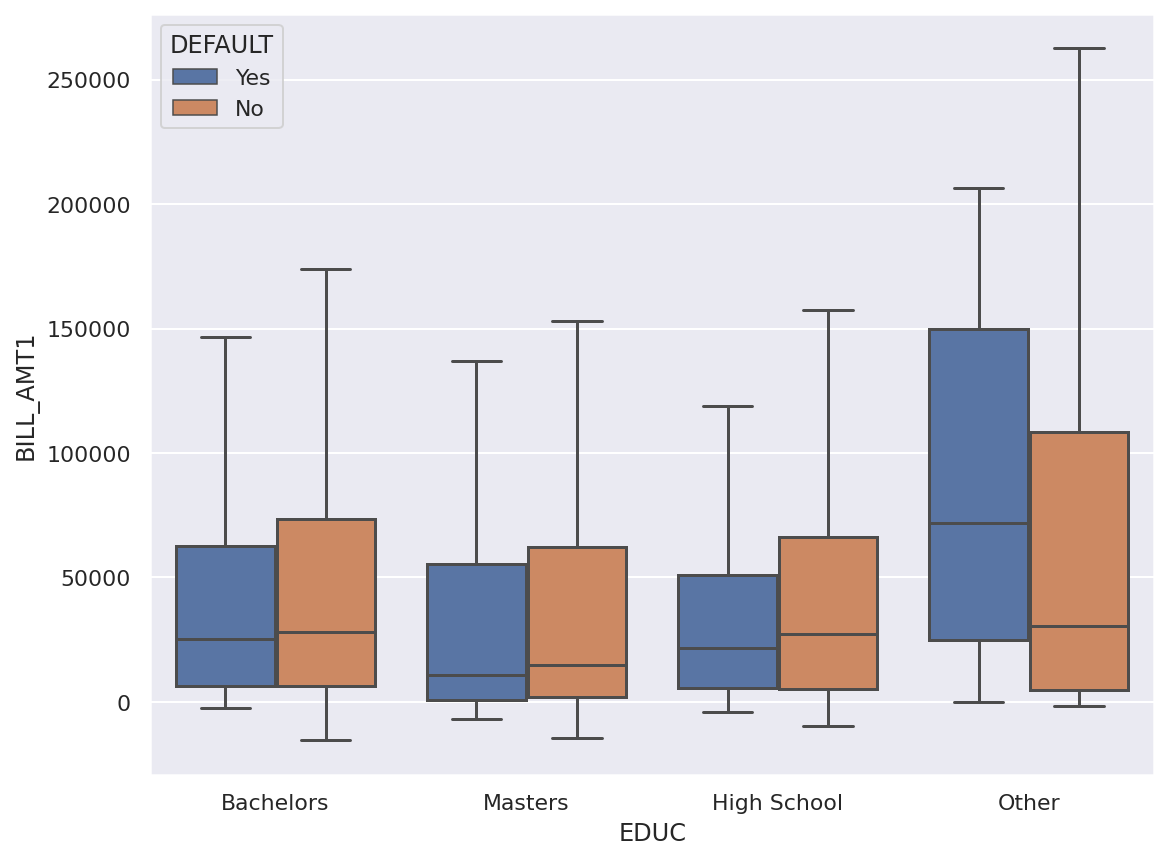

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='EDUC', y='BILL_AMT1', hue='DEFAULT', data=df_cc, showfliers = False);

Not only has better income, but it seems people with Master Degree has better money management since their median of bill is lowest than other degree. But the tail among all degree is long, indicating most of the holder are having large credit card bills.

### Education vs Pay Amount

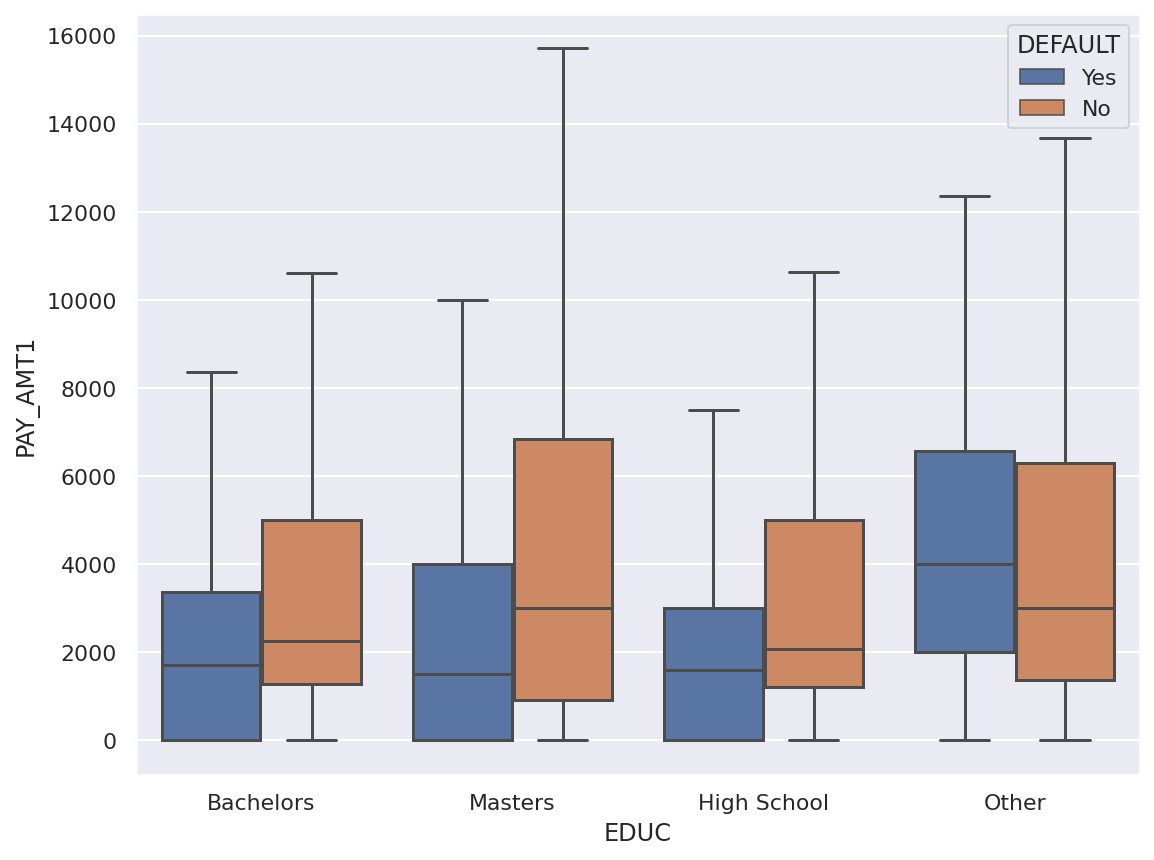

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='EDUC', y='PAY_AMT1', hue='DEFAULT', data=df_cc, showfliers = False);

No wonder that the Master Degree has better non-default performance, because they also pay the bill with larger amount than other degree.

### Marital Status vs Limit Balance

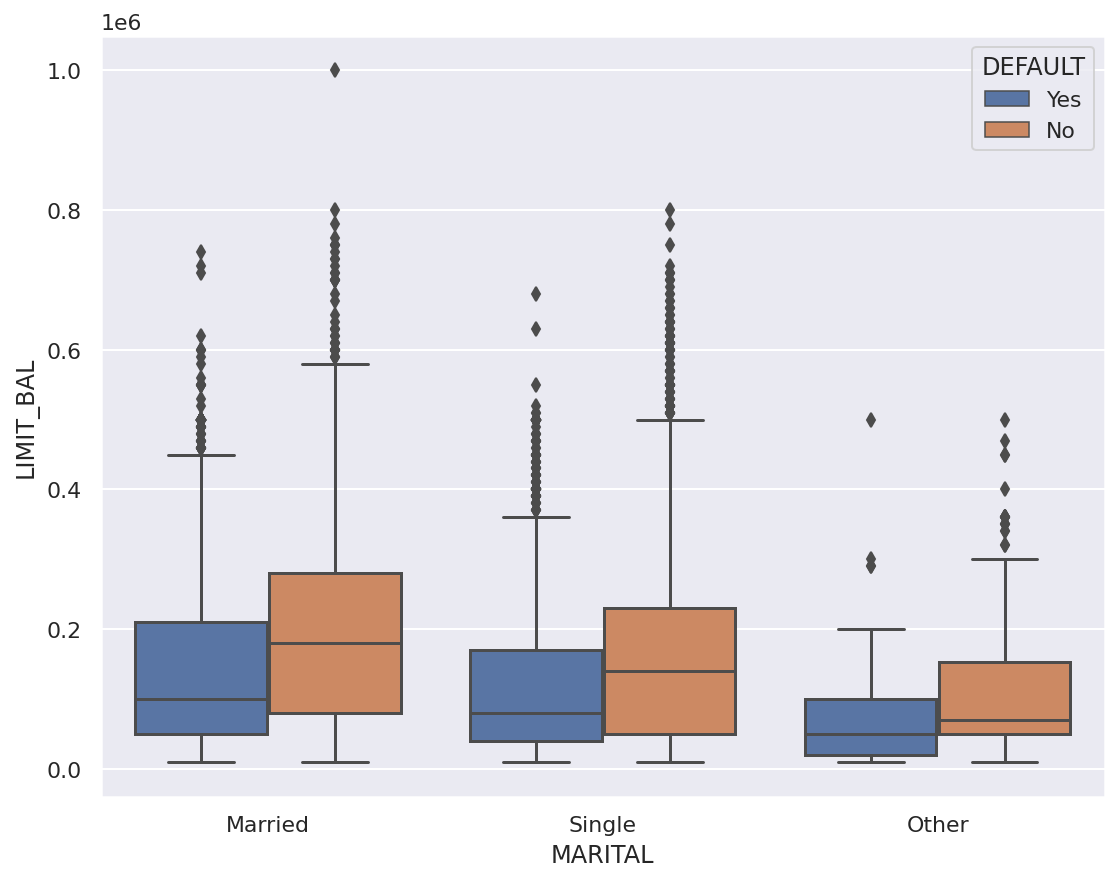

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='MARITAL', y='LIMIT_BAL', hue='DEFAULT', data=df_cc);

Mean of Limit Balance is higher than the Single status, this might happened because the Married card holder may have better income (since combined with their spouse), than the Single one, thus the bank may give them better limit.

### Marital Status vs Age

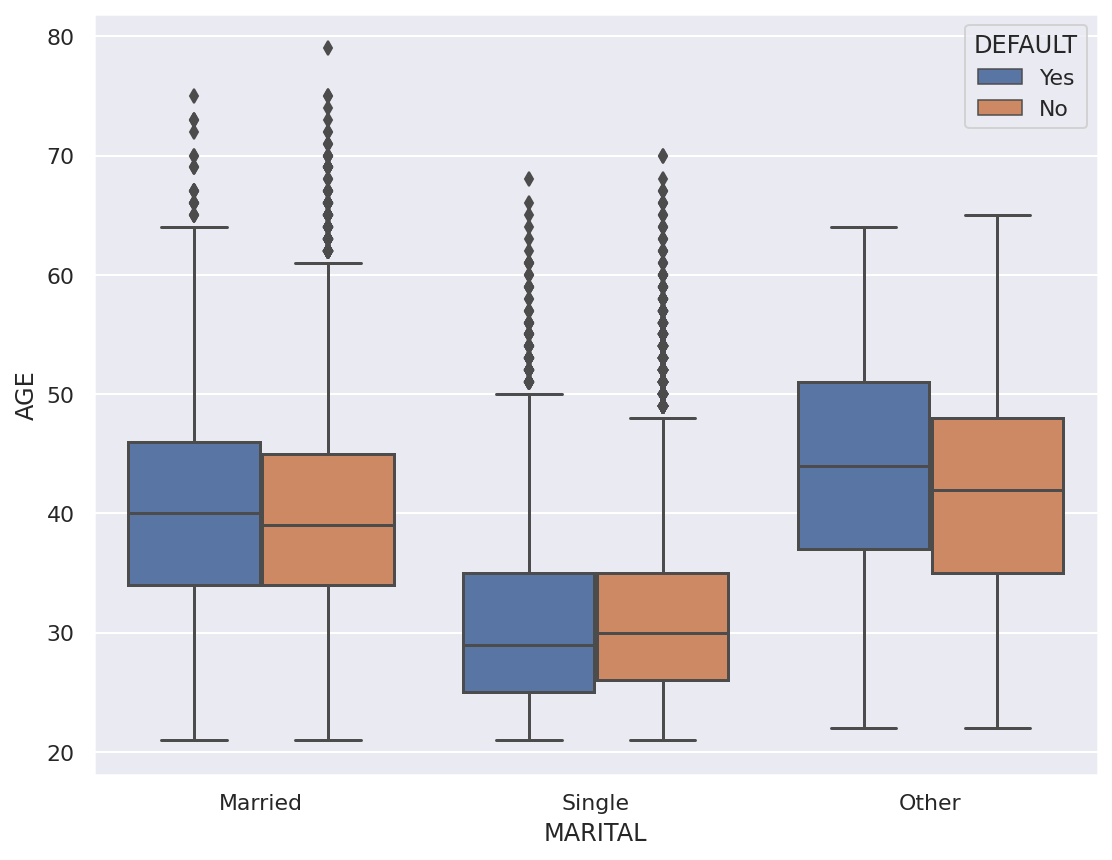

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='MARITAL', y='AGE', hue='DEFAULT', data=df_cc);

Not so surprisingly, Married card holder has older median age than the single one.

### Marital Status vs Bill Amount

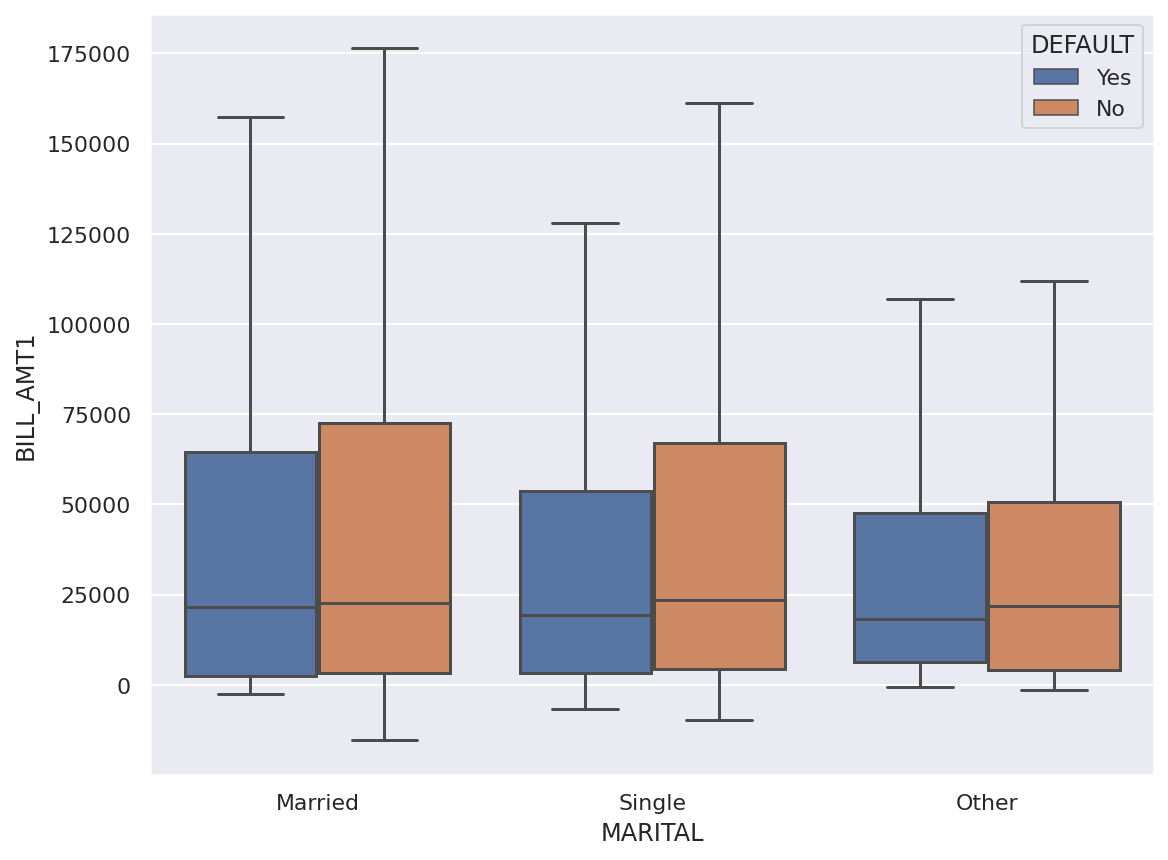

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='MARITAL', y='BILL_AMT1', hue='DEFAULT', data=df_cc, showfliers = False);

It seems there is no significant difference between Married, Single and Other status regarding their bill amount. They have similar median bill amount, even among default and non-default. 

### Marital Status vs Pay Amount

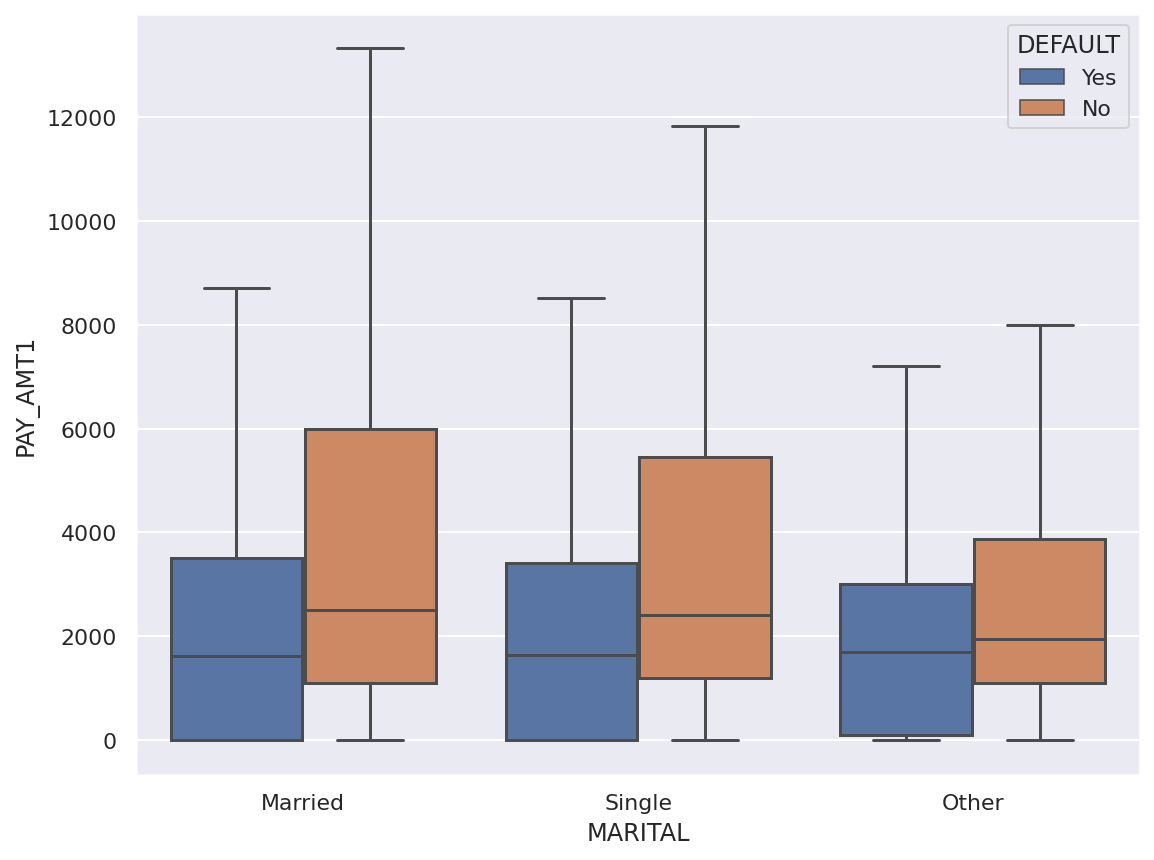

In [ ]:
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x='MARITAL', y='PAY_AMT1', hue='DEFAULT', data=df_cc, showfliers = False);

It seems there is also no significant difference between married and single holder, regarding to their Pay Amount. Althouh similar to the other pattern, the one with default always pay bill with lesser amount than the non-default.

# Final Conclusion

- The number of Non-Default (78%) is much larger than the Default (22%), which is common in real life scenario. Most bank definitely filter their applicants so their default rate going to be low.
-  There are no strong correlation among numerical values. 
- Based on visualization, there is no signficant difference between Gender in their ability to pay the bill, and to be a default holder or non.
- The Education seems playing important role to profiling the default holder. Higher degree tends to has a beter money management, they pay the bill with large amount, and avoid large bill amount.
- As for the Marital Status, the interesting finding is people with Married status tend to have bigger limit balance, probably because of the joined income with their spouse.  But their default rate is not as good as the Single person. Our hyphotesis is even if the Married one might have better income, but their expense are also higher, which may lead to larger bills, and tend to default.
